In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import wrapper

# Load dataset

In [2]:
list_column = ['previousHomeWin', 'previousAwayWin', 'previousDraw',
       'previousManagerHomeWin', 'previousManagerAwayWin',
       'previousManagerDraw', 'homeAvgRating', 'homePosition', 'homePoint',
       'homeForm', 'awayAvgRating', 'awayPosition', 'awayPoint', 'awayForm',
       'homeExpectedGoal', 'awayExpectedGoal', 'homeExpectedAssist',
       'awayExpectedAssist', 'homeBallPosession', 'homeShotOnTarget',
       'awayShotOnTarget', 'homeShotOffTarget', 'awayShotOffTarget',
       'homeBlockedShot', 'awayBlockedShot', 'homeCorner', 'awayCorner',
       'homeOffside', 'awayOffside', 'homeYellowCard', 'awayYellowCard',
       'homeRedCard', 'awayRedCard', 'homeFreekick', 'awayFreekick',
       'homeThrowIn', 'awayThrowIn', 'homeGoalkick', 'awayGoalkick',
       'homeBigChance', 'awayBigChance', 'homeBigChanceMissed',
       'awayBigChanceMissed', 'homeHitWoodwork', 'awayHitWoodwork',
       'homeCounterAttack', 'awayCounterAttack', 'homeCounterAttackShot',
       'awayCounterAttackShot', 'homeCounterAttackGoal',
       'awayCounterAttackGoal', 'homeShotInsideBox', 'awayShotInsideBox',
       'homeGoalSave', 'awayGoalSave', 'homePass', 'awayPass',
       'homeAccuratePass', 'awayAccuratePass', 'homeLongPass', 'awayLongPass',
       'homeAccurateLongPass', 'awayAccurateLongPass', 'homeCross',
       'awayCross', 'homeAccurateCross', 'awayAccurateCross', 'homeDribble',
       'awwayDribble', 'homeSuccessfulDribble', 'awaySuccessfulDribble',
       'homePossesionLost', 'awayPossesionLost', 'homeDuelWon', 'awayDuelWon',
       'homeAerialWon', 'awayAerialWon', 'homeTackle', 'awayTackle',
       'homeInterception', 'awayInterception', 'homeClearance',
       'awayClearance', 'homeTeamId', 'awayTeamId', 'homeScorePeriod1',
       'homeScoreCurrent', 'awayScorePeriod1', 'awayScoreCurrent']

df = pd.read_csv("match_all_statistic.csv", usecols=list_column)

In [3]:
df.head()

,previousHomeWin,previousAwayWin,previousDraw,previousManagerHomeWin,previousManagerAwayWin,previousManagerDraw,homeAvgRating,homePosition,homePoint,homeForm,...,homeInterception,awayInterception,homeClearance,awayClearance,homeTeamId,awayTeamId,homeScorePeriod1,homeScoreCurrent,awayScorePeriod1,awayScoreCurrent
0,9,4,2,2,2,0,NaN,0,NaN,NaN,...,0.00,5.00,2.00,10.00,42,14,2,2,0,1
1,8,4,8,1,4,0,NaN,0,NaN,NaN,...,5.00,6.00,7.00,8.00,39,40,2,5,1,1
2,5,5,4,0,0,1,NaN,0,NaN,NaN,...,3.00,2.00,6.00,12.00,60,37,0,1,0,1
3,11,6,3,2,4,1,NaN,0,NaN,NaN,...,5.00,0.00,7.00,10.00,48,43,0,0,0,1
4,1,2,1,1,0,0,NaN,0,NaN,NaN,...,4.00,8.00,5.00,16.00,30,72,1,4,0,1


# Train-test split

In [4]:
y1 = df["homeScoreCurrent"]   # homeScoreCurrent
y2 = df["awayScoreCurrent"]   # awayScoreCurrent
y = pd.concat([y1, y2], axis=1)

conditions = [
    (y['homeScoreCurrent'] < y['awayScoreCurrent']),
    (y['homeScoreCurrent'] == y['awayScoreCurrent']),
    (y['homeScoreCurrent'] > y['awayScoreCurrent'])
]
values = [0, 1, 3]
y = pd.DataFrame(np.select(conditions, values))

thisFilter = df.filter(["id", "awayScoreCurrent", "homeScoreCurrent"])
X = df.drop(thisFilter, axis=1)

In [5]:
X.head()

,previousHomeWin,previousAwayWin,previousDraw,previousManagerHomeWin,previousManagerAwayWin,previousManagerDraw,homeAvgRating,homePosition,homePoint,homeForm,...,homeTackle,awayTackle,homeInterception,awayInterception,homeClearance,awayClearance,homeTeamId,awayTeamId,homeScorePeriod1,awayScorePeriod1
0,9,4,2,2,2,0,NaN,0,NaN,NaN,...,9.00,8.00,0.00,5.00,2.00,10.00,42,14,2,0
1,8,4,8,1,4,0,NaN,0,NaN,NaN,...,11.00,3.00,5.00,6.00,7.00,8.00,39,40,2,1
2,5,5,4,0,0,1,NaN,0,NaN,NaN,...,10.00,16.00,3.00,2.00,6.00,12.00,60,37,0,0
3,11,6,3,2,4,1,NaN,0,NaN,NaN,...,7.00,3.00,5.00,0.00,7.00,10.00,48,43,0,0
4,1,2,1,1,0,0,NaN,0,NaN,NaN,...,5.00,8.00,4.00,8.00,5.00,16.00,30,72,1,0


In [6]:
y.head()

,0
0,3
1,3
2,1
3,0
4,3


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)
X_train

,previousHomeWin,previousAwayWin,previousDraw,previousManagerHomeWin,previousManagerAwayWin,previousManagerDraw,homeAvgRating,homePosition,homePoint,homeForm,...,homeTackle,awayTackle,homeInterception,awayInterception,homeClearance,awayClearance,homeTeamId,awayTeamId,homeScorePeriod1,awayScorePeriod1
351,9,5,1,4,1,0,6.86,8,32.00,1.40,...,3.00,4.00,8.00,5.00,1.00,15.00,43,14,1,0
447,7,5,4,1,0,0,6.79,19,25.00,0.20,...,14.00,8.00,5.00,3.00,12.00,7.00,31,3,1,1
410,4,1,3,1,1,1,6.71,19,24.00,1.20,...,7.00,6.00,6.00,1.00,4.00,4.00,60,43,0,1
89,4,6,10,0,1,3,6.90,13,11.00,1.60,...,10.00,7.00,5.00,6.00,8.00,9.00,3,39,1,2
451,8,9,3,4,1,1,6.83,6,51.00,2.60,...,1.00,9.00,1.00,3.00,2.00,9.00,40,43,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,12,5,3,2,1,0,6.87,6,20.00,1.60,...,8.00,6.00,5.00,2.00,9.00,11.00,35,37,1,0
60,5,14,1,0,0,0,6.86,16,4.00,0.80,...,6.00,8.00,4.00,3.00,12.00,5.00,3,17,1,0
166,5,8,7,1,3,0,6.62,19,0.00,0.00,...,9.00,6.00,7.00,2.00,12.00,3.00,35,44,1,0
267,7,8,5,2,2,3,6.89,13,14.00,0.80,...,7.00,6.00,9.00,9.00,12.00,3.00,48,31,0,1


In [8]:
X_test

,previousHomeWin,previousAwayWin,previousDraw,previousManagerHomeWin,previousManagerAwayWin,previousManagerDraw,homeAvgRating,homePosition,homePoint,homeForm,...,homeTackle,awayTackle,homeInterception,awayInterception,homeClearance,awayClearance,homeTeamId,awayTeamId,homeScorePeriod1,awayScorePeriod1
2,5,5,4,0,0,1,NaN,0,NaN,NaN,...,10.00,16.00,3.00,2.00,6.00,12.00,60,37,0,0
515,9,6,5,1,5,1,6.79,18,31.00,0.60,...,6.00,11.00,5.00,2.00,4.00,10.00,31,37,1,0
474,4,10,2,2,1,0,6.74,13,39.00,2.40,...,7.00,5.00,4.00,6.00,10.00,4.00,60,38,1,1
139,4,0,2,4,0,2,NaN,0,NaN,NaN,...,9.00,8.00,7.00,3.00,7.00,10.00,31,50,1,0
468,8,7,5,2,2,3,6.80,18,29.00,0.80,...,10.00,4.00,5.00,4.00,23.00,4.00,31,48,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,11,1,8,10,2,2,6.97,4,17.00,2.00,...,7.00,8.00,4.00,9.00,9.00,13.00,44,48,0,0
148,13,4,3,6,1,1,7.15,4,3.00,3.00,...,3.00,7.00,4.00,4.00,5.00,8.00,42,31,2,0
507,8,1,5,3,0,0,6.82,7,58.00,1.40,...,4.00,8.00,5.00,2.00,1.00,6.00,40,30,2,1
416,2,10,8,0,0,1,6.81,18,26.00,1.00,...,12.00,9.00,6.00,3.00,7.00,12.00,48,33,0,0


In [9]:
y_train

,0
351,3
447,3
410,3
89,1
451,3
...,...
262,3
60,3
166,3
267,0


# Fill NaN

Since some fillna methods are based on typical distribution of column, I will examine the train data to find appropriate method for each column => apply it to test data

In [10]:
nullseries = X_train.isnull().sum()
print(nullseries[nullseries > 0])

homeAvgRating    17
homePoint        17
homeForm         17
awayAvgRating    17
awayPoint        17
awayForm         17
dtype: int64


In [11]:
X_train[["homeAvgRating", "homePoint", "homeForm", "awayAvgRating", "awayPoint", "awayForm"]].describe()

,homeAvgRating,homePoint,homeForm,awayAvgRating,awayPoint,awayForm
count,421.00,421.00,421.00,421.00,421.00,421.00
mean,6.88,21.69,1.37,6.89,21.85,1.43
std,0.15,17.96,0.77,0.14,18.01,0.79
min,6.50,0.00,0.00,6.49,0.00,0.00
25%,6.78,7.00,0.80,6.79,7.00,0.80
50%,6.87,17.00,1.40,6.87,17.00,1.40
75%,6.96,31.00,2.00,6.96,30.00,2.00
max,7.53,85.00,3.00,7.41,89.00,3.00


**homePoint** and **awayPoint** has very high maximum value and high standard deviation => median instead of mean (to reduce the effect of outliers)

In [13]:
X_train['homePoint'].median(), X_train['awayPoint'].median()

(17.0, 17.0)

In [11]:

X_train['homeAvgRating'] = X_train['homeAvgRating'].fillna(X_train['homeAvgRating'].mean())
X_test['homeAvgRating'] = X_test['homeAvgRating'].fillna(X_train['homeAvgRating'].mean())

X_train['homePoint'] = X_train['homePoint'].fillna(X_train['homePoint'].median())
X_test['homePoint'] = X_test['homePoint'].fillna(X_train['homePoint'].median())

X_train['homeForm'] = X_train['homeForm'].fillna(X_train['homeForm'].mean())
X_test['homeForm'] = X_test['homeForm'].fillna(X_train['homeForm'].mean())

X_train['awayAvgRating'] = X_train['awayAvgRating'].fillna(X_train['awayAvgRating'].mean())
X_test['awayAvgRating'] = X_test['awayAvgRating'].fillna(X_train['awayAvgRating'].mean())

X_train['awayPoint'] = X_train['awayPoint'].fillna(X_train['awayPoint'].median())
X_test['awayPoint'] = X_test['awayPoint'].fillna(X_train['awayPoint'].median())

X_train['awayForm'] = X_train['awayForm'].fillna(X_train['awayForm'].mean())
X_test['awayForm'] = X_test['awayForm'].fillna(X_train['awayForm'].mean())

Train with all column

In [12]:
score = wrapper.lazy_train(X_train, X_test, y_train, y_test)
score

  0%|          | 0/29 [00:00<?, ?it/s]

100%|██████████| 29/29 [00:03<00:00,  8.46it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000352 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2105
[LightGBM] [Info] Number of data points in the train set: 438, number of used features: 84
[LightGBM] [Info] Start training from score -1.207022
[LightGBM] [Info] Start training from score -1.497251
[LightGBM] [Info] Start training from score -0.739885
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RidgeClassifier,0.81,0.79,None,0.80,0.03
LinearDiscriminantAnalysis,0.79,0.78,None,0.79,0.06
LinearSVC,0.79,0.77,None,0.79,0.11
CalibratedClassifierCV,0.79,0.77,None,0.79,0.16
LogisticRegression,0.79,0.77,None,0.79,0.05
PassiveAggressiveClassifier,0.78,0.76,None,0.78,0.03
RidgeClassifierCV,0.78,0.76,None,0.78,0.06
SGDClassifier,0.78,0.76,None,0.78,0.03
Perceptron,0.77,0.74,None,0.76,0.02


# Feature selection

In this part, I select the feature using sklearn and feature_engine library. After each step, I re-train models using lazy_train wrapper to check the result

## 1. Work with xG and xA

Technically, xG and xA can't be 0. However, in my initial witness, the xA in season 2022-2023 is never provided, and xG is sometimes not provided.

Since they are importance feature, I will check the amount of 0 value (not provided in sofascore api), then decided to fill with another value or drop column (or row with value = 0)

### 1.1. xG

In [13]:
(X_train["homeExpectedGoal"] == 0).sum(), (X_train["awayExpectedGoal"] == 0).sum()

(5, 9)

That's a small number => xG can be filled by more reasonable value

In [14]:
X_train["homeExpectedGoal"].describe()   # => median is ok

count   438.00
mean      0.75
std       0.52
min       0.00
25%       0.34
50%       0.66
75%       1.08
max       2.69
Name: homeExpectedGoal, dtype: float64

In [15]:
X_train["awayExpectedGoal"].describe()   # => median is ok

count   438.00
mean      0.58
std       0.45
min       0.00
25%       0.22
50%       0.46
75%       0.84
max       2.34
Name: awayExpectedGoal, dtype: float64

In [16]:
X_train['homeExpectedGoal'] = X_train['homeExpectedGoal'].replace(0, X_train['homeExpectedGoal'].median())
X_test['homeExpectedGoal'] = X_test['homeExpectedGoal'].replace(0, X_train['homeExpectedGoal'].median())

X_train['awayExpectedGoal'] = X_train['awayExpectedGoal'].replace(0, X_train['awayExpectedGoal'].median())
X_test['awayExpectedGoal'] = X_test['awayExpectedGoal'].replace(0, X_train['awayExpectedGoal'].median())

### 1.2. xA

In [17]:
(X_train["homeExpectedAssist"] == 0).sum(), (X_train["awayExpectedAssist"] == 0).sum()

(313, 313)

That's about 2/3 of the row number. If these rows are dropped, the data is nearly the same as EPL 23-24! So I drop those 2 columns to keep 313 records of the table

In [18]:
X_train.drop(["homeExpectedAssist", "awayExpectedAssist"], axis=1, inplace=True)
X_test.drop(["homeExpectedAssist", "awayExpectedAssist"], axis=1, inplace=True)

### 1.3. Train

In [19]:
score = wrapper.lazy_train(X_train, X_test, y_train, y_test)
score

  0%|          | 0/29 [00:00<?, ?it/s]

100%|██████████| 29/29 [00:02<00:00, 13.29it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000355 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2027
[LightGBM] [Info] Number of data points in the train set: 438, number of used features: 82
[LightGBM] [Info] Start training from score -1.207022
[LightGBM] [Info] Start training from score -1.497251
[LightGBM] [Info] Start training from score -0.739885
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LogisticRegression,0.81,0.78,None,0.80,0.05
LinearDiscriminantAnalysis,0.78,0.77,None,0.78,0.05
LinearSVC,0.79,0.77,None,0.79,0.12
RidgeClassifier,0.79,0.77,None,0.79,0.02
PassiveAggressiveClassifier,0.78,0.76,None,0.78,0.04
RidgeClassifierCV,0.78,0.76,None,0.78,0.05
CalibratedClassifierCV,0.78,0.76,None,0.78,0.16
Perceptron,0.78,0.76,None,0.78,0.03
SGDClassifier,0.77,0.74,None,0.76,0.03


## 2. Remove constant, quasi-constant and duplicate feature

In [20]:
from sklearn.pipeline import Pipeline
from feature_engine.selection import DropDuplicateFeatures, DropConstantFeatures

### Remove constant and quasi-constant features

In [21]:
sel = DropConstantFeatures(tol=0.9998, variables=None, missing_values='raise')
sel.fit(X_train)

sel.features_to_drop_

[]

### Remove duplicate feature

In [22]:
sel = DropDuplicateFeatures(variables=None, missing_values='raise')
sel.fit(X_train)

sel.duplicated_feature_sets_

[]

### => No column has been removed

## 3. Correlation Feature Selection

Features with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. 

Good feature has high correlation with target label, and low correlation with other features

So we can drop features which has high correlation with other features, or low correlation with target label

### 3.1. Visualize Correlation heatmap

In [23]:
# Run this to show heatmap

# import matplotlib.pyplot as plt
# import seaborn as sns

# color = plt.get_cmap('RdYlGn')   # default color
# color.set_bad('lightblue')

# corrmat = X_train.corr()
# plt.figure(figsize = (70, 70))
# plt.tight_layout()
# sns.heatmap(corrmat, annot=True, cmap=color)

### 3.2. Correlation Feature Selection with feature_engine

SmartCorrelatedSelection loop through feature pairs to find their correlation (basically like loop through each column in the above heatmap), decide high/low based on threshold parameter. Then it decide the feature to be kept by selection_method parameter  

- selection_method = variance

In [50]:
from feature_engine.selection import SmartCorrelatedSelection

sel = SmartCorrelatedSelection(threshold=0.9, selection_method="variance")
sel.fit(X_train, y_train)

sel.features_to_drop_

['homeBallPosession',
 'homeCounterAttackShot',
 'awayCounterAttackShot',
 'homePass',
 'awayPass',
 'awayAccuratePass']

In [51]:
X_train_fe_variance = sel.transform(X_train)
X_test_fe_variance = sel.transform(X_test)

In [52]:
score = wrapper.lazy_train(X_train_fe_variance, X_test_fe_variance, y_train, y_test, scaler="quantile")
score   # adaboost make it 85%

  0%|          | 0/29 [00:00<?, ?it/s]

100%|██████████| 29/29 [00:01<00:00, 14.98it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000313 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1606
[LightGBM] [Info] Number of data points in the train set: 438, number of used features: 76
[LightGBM] [Info] Start training from score -1.207022
[LightGBM] [Info] Start training from score -1.497251
[LightGBM] [Info] Start training from score -0.739885
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,0.85,0.85,None,0.85,0.20
LogisticRegression,0.81,0.78,None,0.80,0.04
CalibratedClassifierCV,0.79,0.77,None,0.79,0.14
LinearSVC,0.79,0.77,None,0.79,0.11
RidgeClassifierCV,0.78,0.76,None,0.78,0.05
LinearDiscriminantAnalysis,0.78,0.76,None,0.78,0.05
RidgeClassifier,0.78,0.76,None,0.78,0.02
SGDClassifier,0.77,0.75,None,0.77,0.03
PassiveAggressiveClassifier,0.77,0.75,None,0.77,0.03


- selection_method = cardinality

In [27]:
from feature_engine.selection import SmartCorrelatedSelection

sel = SmartCorrelatedSelection(threshold=0.9, selection_method="cardinality")
sel.fit(X_train, y_train)

sel.features_to_drop_

['homeBallPosession',
 'homeCounterAttackShot',
 'awayCounterAttackShot',
 'awayPass',
 'homeAccuratePass',
 'awayAccuratePass']

In [28]:
X_train_fe_cardinality = sel.transform(X_train)
X_test_fe_cardinality = sel.transform(X_test)

In [29]:
score = wrapper.lazy_train(X_train_fe_cardinality, X_test_fe_cardinality, y_train, y_test, scaler="quantile")
score   # same as variance?

  0%|          | 0/29 [00:00<?, ?it/s]

100%|██████████| 29/29 [00:01<00:00, 14.82it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000588 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1609
[LightGBM] [Info] Number of data points in the train set: 438, number of used features: 76
[LightGBM] [Info] Start training from score -1.207022
[LightGBM] [Info] Start training from score -1.497251
[LightGBM] [Info] Start training from score -0.739885
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,0.85,0.85,None,0.85,0.19
LogisticRegression,0.81,0.78,None,0.80,0.04
CalibratedClassifierCV,0.79,0.77,None,0.79,0.14
LinearSVC,0.79,0.77,None,0.79,0.11
RidgeClassifierCV,0.78,0.76,None,0.78,0.05
LinearDiscriminantAnalysis,0.78,0.76,None,0.78,0.05
RidgeClassifier,0.78,0.76,None,0.78,0.02
Perceptron,0.78,0.76,None,0.78,0.02
SGDClassifier,0.77,0.75,None,0.77,0.03


- selection_method = model_performance

In [30]:
from sklearn.ensemble import RandomForestClassifier
from feature_engine.selection import SmartCorrelatedSelection

rf = RandomForestClassifier(
    n_estimators=20,
    random_state=42,
)

sel = SmartCorrelatedSelection(threshold=0.9, selection_method="model_performance", estimator=rf, cv=3)
sel.fit(X_train, y_train)

sel.features_to_drop_

['homeBallPosession',
 'awayCounterAttack',
 'homeCounterAttackShot',
 'awayPass',
 'homeAccuratePass',
 'awayAccuratePass']

In [31]:
X_train_fe_model_performance = sel.transform(X_train)
X_test_fe_model_performance = sel.transform(X_test)

In [32]:
score = wrapper.lazy_train(X_train_fe_model_performance, X_test_fe_model_performance, y_train, y_test, scaler="quantile")
score   # no improvement compared to X_train

  0%|          | 0/29 [00:00<?, ?it/s]

100%|██████████| 29/29 [00:02<00:00, 11.31it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000303 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1608
[LightGBM] [Info] Number of data points in the train set: 438, number of used features: 76
[LightGBM] [Info] Start training from score -1.207022
[LightGBM] [Info] Start training from score -1.497251
[LightGBM] [Info] Start training from score -0.739885
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,0.85,0.85,None,0.85,0.19
LogisticRegression,0.81,0.78,None,0.80,0.11
Perceptron,0.79,0.77,None,0.79,0.04
LinearSVC,0.79,0.77,None,0.79,0.13
CalibratedClassifierCV,0.79,0.77,None,0.79,0.20
RidgeClassifierCV,0.78,0.76,None,0.78,0.05
LinearDiscriminantAnalysis,0.78,0.76,None,0.78,0.07
RidgeClassifier,0.78,0.76,None,0.78,0.02
PassiveAggressiveClassifier,0.77,0.75,None,0.77,0.05


## 4. Statistical Feature Selection

### 4.1. Mutual Information

Mutual information measures the amount of information can be obtained from one random variable given another variable.

Therefore, we want to keep features have high mutual information with the target label 

In [33]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

# Select k best features based on mutual information
sel = SelectKBest(mutual_info_classif, k=20)
sel.fit(X_train, y_train)

SelectKBest(k=20,
            score_func=<function mutual_info_classif at 0x000001356260FF70>)

In [34]:
X_train_mi = sel.transform(X_train)
X_test_mi = sel.transform(X_test)

In [35]:
score = wrapper.lazy_train(X_train_mi, X_test_mi, y_train, y_test, scaler="quantile")
score   # I tried with many k values and the result doesn't improve

100%|██████████| 29/29 [00:01<00:00, 20.91it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000118 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 785
[LightGBM] [Info] Number of data points in the train set: 438, number of used features: 20
[LightGBM] [Info] Start training from score -1.207022
[LightGBM] [Info] Start training from score -1.497251
[LightGBM] [Info] Start training from score -0.739885
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
QuadraticDiscriminantAnalysis,0.81,0.78,None,0.80,0.02
LinearSVC,0.81,0.77,None,0.80,0.05
RidgeClassifierCV,0.81,0.77,None,0.80,0.02
RidgeClassifier,0.81,0.77,None,0.80,0.02
SGDClassifier,0.79,0.77,None,0.79,0.03
LinearDiscriminantAnalysis,0.79,0.76,None,0.79,0.02
Perceptron,0.78,0.76,None,0.78,0.02
CalibratedClassifierCV,0.79,0.75,None,0.78,0.08
BaggingClassifier,0.76,0.75,None,0.75,0.08


### 4.2. ANOVA f-test Feature Selection

In [36]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

sel = SelectKBest(f_classif, k=53)
sel.fit(X_train, y_train)

SelectKBest(k=53)

In [37]:
X_train_f = sel.transform(X_train)
X_test_f = sel.transform(X_test)

53


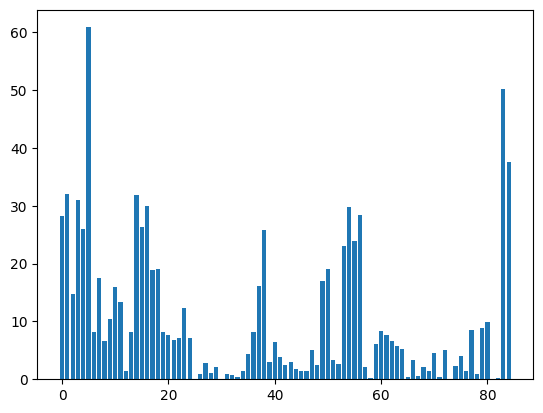

In [38]:
import matplotlib.pyplot as plt

count = len([i for i in sel.scores_ if i > 3]) # 53
print(count)

plt.bar([i for i in range(len(sel.scores_))], sel.scores_)
plt.show()

In [39]:
score = wrapper.lazy_train(X_train_f, X_test_f, y_train, y_test, scaler="quantile")
score   # 81 => 82

100%|██████████| 29/29 [00:02<00:00, 13.64it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000373 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1529
[LightGBM] [Info] Number of data points in the train set: 438, number of used features: 53
[LightGBM] [Info] Start training from score -1.207022
[LightGBM] [Info] Start training from score -1.497251
[LightGBM] [Info] Start training from score -0.739885
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearDiscriminantAnalysis,0.82,0.81,None,0.82,0.05
LinearSVC,0.82,0.80,None,0.82,0.11
RidgeClassifierCV,0.81,0.79,None,0.80,0.04
RidgeClassifier,0.81,0.79,None,0.80,0.02
CalibratedClassifierCV,0.81,0.78,None,0.80,0.10
PassiveAggressiveClassifier,0.79,0.78,None,0.79,0.02
SGDClassifier,0.79,0.77,None,0.79,0.03
LogisticRegression,0.77,0.76,None,0.77,0.04
LGBMClassifier,0.76,0.73,None,0.75,0.13


## 5. Wrapper method

X_train (after drop xA) still has 85 columns. We must reduce it

In [21]:
from feature_engine.selection import SmartCorrelatedSelection

sel = SmartCorrelatedSelection(threshold=0.8, selection_method="variance")
sel.fit(X_train, y_train)

len(sel.features_to_drop_)

12

In [22]:
X_train_fe_variance = sel.transform(X_train)
X_test_fe_variance = sel.transform(X_test)

### 5.1. Step Forward Feature Selection

- Step forward feature selection starts with the evaluation of each individual feature, and selects that which results in the best performing selected algorithm model
- Next, all possible combinations of the that selected feature and a subsequent feature are evaluated, and a second feature is selected, and so on, until the required predefined number of features is selected

In [19]:
def evaluate(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)

    print('Train accuracy: {}'.format(clf.score(X_train, y_train)))
    
    print('Test accuracy: {}'.format(clf.score(X_test, y_test)))

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, r2_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.preprocessing import QuantileTransformer

In [44]:
clf = RandomForestClassifier(n_estimators=10, n_jobs=4, random_state=0)

sc = QuantileTransformer()

X_train_scaler = sc.fit_transform(X_train_fe_variance)

sfs = SFS(clf, 
            k_features=10, # the more features we want, the longer it will take to run
            forward=True, 
            floating=False, # for smaller number of feature subset combinations can be sampled
            verbose=2, # this indicates how much to print out intermediate steps
            scoring='accuracy',
            cv=3,
         )

sfs = sfs.fit(X_train_scaler, y_train)

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    7.6s

[2023-12-17 22:59:46] Features: 1/10 -- score: 0.6210045662100457[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    5.8s

[2023-12-17 22:59:54] Features: 2/10 -- score: 0.7054794520547946[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    6.2s

[2023-12-17 23:00:03] Features: 3/10 -- score: 0.728310502283105[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    9.7s

[2023-12-17 23:00:17] Features: 4/10 -- score: 0.7374429223744293[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   11.6s

[2023-12-17 23:00:31] Features: 5/10 -- score: 0.7351598173515982[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    8.0s

[2023-12-17 23:00:41] Features: 6/10 -- score: 0.7374429223744291[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    9.4s

[2023-12-17 23:00:52] Features: 7/10 -- score: 0.7465753424657534[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    9.5s

[2023-12-17 23:01:04] Features: 8/10 -- score: 0.7

### 5.2. Step Backward Feature Selection

- Step forward feature selection starts with the evaluation of all features - 1, and selects that which results in the worst performing selected algorithm model
- Remove that worst feature, then train with all subsets of remaining feature -1, then selects the worst feature. Remove it, do again until the required predefined number of features is selected

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, r2_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.preprocessing import QuantileTransformer

In [46]:
clf = RandomForestClassifier(n_estimators=10, n_jobs=4, random_state=0)

sc = QuantileTransformer()
X_train_scaler = sc.fit_transform(X_train_fe_variance)
X_test_scaler = sc.transform(X_test_fe_variance)

X_train_scaler = pd.DataFrame(X_train_scaler, columns = X_train_fe_variance.columns)
X_test_scaler = pd.DataFrame(X_test_scaler, columns = X_test_fe_variance.columns)

sfs = SFS(clf, 
            k_features=30, # the more features we want, the longer it will take to run
            forward=False, 
            floating=False, # for smaller number of feature subset combinations can be sampled
            verbose=2, # this indicates how much to print out intermediate steps
            scoring='accuracy',
            cv=3,
         )

sfs = sfs.fit(X_train_scaler, y_train)

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   10.2s

[2023-12-17 23:01:39] Features: 55/30 -- score: 0.7146118721461187[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   10.2s

[2023-12-17 23:01:53] Features: 54/30 -- score: 0.7214611872146119[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   10.3s

[2023-12-17 23:02:07] Features: 53/30 -- score: 0.728310502283105[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   10.9s

[2023-12-17 23:02:22] Features: 52/30 -- score: 0.7374429223744293[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   11.7s

[2023-12-17 23:02:37] Features: 51/30 -- score: 0.6917808219178081[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   10.2s

[2023-12-17 23:02:50] Features: 50/30 -- score: 0.7077625570776256[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   11.6s

[2023-12-17 23:03:04] Features: 49/30 -- score: 0.6872146118721462[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   12.0s

[2023-12-17 23:03:19] Features: 48/30 -- sc

In [47]:
from sklearn.linear_model import LogisticRegression

sc = QuantileTransformer()
X_train_scaler = sc.fit_transform(X_train_fe_variance)
X_test_scaler = sc.transform(X_test_fe_variance)

X_train_scaler = pd.DataFrame(X_train_scaler, columns = X_train_fe_variance.columns)
X_test_scaler = pd.DataFrame(X_test_scaler, columns = X_test_fe_variance.columns)

clf = LogisticRegression()

sfs = SFS(clf, 
            k_features=40, # the more features we want, the longer it will take to run
            forward=False, 
            floating=False, # for smaller number of feature subset combinations can be sampled
            verbose=2, # this indicates how much to print out intermediate steps
            scoring='accuracy',
            cv=3,
         )

sfs = sfs.fit(X_train_scaler, y_train)

selected_feat = list(sfs.k_feature_names_)    
evaluate(clf, X_train_scaler[selected_feat], X_test_scaler[selected_feat], y_train, y_test)

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.1s

[2023-12-17 23:06:28] Features: 55/30 -- score: 0.8082191780821918[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.2s

[2023-12-17 23:06:32] Features: 54/30 -- score: 0.819634703196347[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    2.8s

[2023-12-17 23:06:36] Features: 53/30 -- score: 0.8264840182648402[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.0s

[2023-12-17 23:06:40] Features: 52/30 -- score: 0.8310502283105023[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.0s

[2023-12-17 23:06:44] Features: 51/30 -- score: 0.8356164383561643[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    2.6s

[2023-12-17 23:06:48] Features: 50/30 -- score: 0.8356164383561645[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    2.5s

[2023-12-17 23:06:51] Features: 49/30 -- score: 0.8356164383561645[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    2.4s

[2023-12-17 23:06:54] Features: 48/30 -- sc

Train accuracy: 0.7564102564102564
Test accuracy: 0.7564102564102564



[2023-12-17 23:07:36] Features: 30/30 -- score: 0.8470319634703197

In [ ]:
from sklearn.svm import LinearSVC

sc = QuantileTransformer()
X_train_scaler = sc.fit_transform(X_train_fe_variance)
X_test_scaler = sc.transform(X_test_fe_variance)

X_train_scaler = pd.DataFrame(X_train_scaler, columns = X_train_fe_variance.columns)
X_test_scaler = pd.DataFrame(X_test_scaler, columns = X_test_fe_variance.columns)

clf = LinearSVC()

sfs = SFS(clf, 
            k_features=40, # the more features we want, the longer it will take to run
            forward=False, 
            floating=False, # for smaller number of feature subset combinations can be sampled
            verbose=2, # this indicates how much to print out intermediate steps
            scoring='accuracy',
            cv=3,
         )

sfs = sfs.fit(X_train_scaler, y_train)

selected_feat = list(sfs.k_feature_names_)    
evaluate(clf, X_train_scaler[selected_feat], X_test_scaler[selected_feat], y_train, y_test)

In [65]:
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.preprocessing import QuantileTransformer, StandardScaler

sc = QuantileTransformer()
X_train_scaler = sc.fit_transform(X_train_fe_variance)
X_test_scaler = sc.transform(X_test_fe_variance)

scaler2 = StandardScaler()
scaler2.fit(X_train_scaler)

X_train_scaler = scaler2.transform(X_train_scaler)
X_test_scaler = scaler2.transform(X_test_scaler)

clf = LogisticRegression()

sfs = SFS(clf, 
            n_features_to_select=60, # 10, 80, 20
            tol=None,
            direction='backward',
            scoring='accuracy',
            cv=3,
            n_jobs=4
         )

sfs1 = sfs.fit(X_train_scaler, y_train)

# print(sfs1.get_params())

X_train_scaler = sfs1.transform(X_train_scaler) 
X_test_scaler = sfs1.transform(X_test_scaler)   

evaluate(clf, X_train_scaler, X_test_scaler, y_train, y_test)

Train accuracy: 0.9429223744292238
Test accuracy: 0.8205128205128205


After several evaluation, its can be seen that Logistc Regression have the overall best performnace 

## 6. Logistic Regression Coefficients

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

scaler1 = QuantileTransformer()
scaler1.fit(X_train)

X_train_scaler = scaler1.transform(X_train)
X_test_scaler = scaler1.transform(X_test)

scaler2 = StandardScaler()
scaler2.fit(X_train_scaler)

X_train_scaler = scaler2.transform(X_train_scaler)
X_test_scaler = scaler2.transform(X_test_scaler)

clf = LogisticRegression(C=1000, penalty='l2', max_iter=300, random_state=10)

sel = SelectFromModel(clf)

sel.fit(X_train_scaler, y_train)

X_train_sfm = sel.transform(X_train_scaler)
X_test_sfm = sel.transform(X_test_scaler)

evaluate(clf, X_train_sfm, X_test_sfm, y_train, y_test)

Train accuracy: 0.8881278538812786
Test accuracy: 0.7948717948717948


In [21]:
sel.get_support()

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True, False,  True, False,
        True,  True, False, False, False, False,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True, False, False,
       False, False, False,  True,  True,  True,  True, False, False,
       False,  True,  True,  True, False,  True, False,  True, False,
        True, False, False, False,  True, False, False, False, False,
       False,  True,  True, False])

In [22]:
X_train_sfm = sel.transform(X_train_scaler)
X_test_sfm = sel.transform(X_test_scaler)

evaluate(LogisticRegression(max_iter=300), X_train_sfm, X_test_sfm, y_train, y_test)

Train accuracy: 0.8812785388127854
Test accuracy: 0.7692307692307693


In [ ]:
from lazypredict import LazyClassifier

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
clf.provide_models(X_train_fe_variance, X_test_fe_variance, y_train, y_test)["AdaBoostClassifier"].score(X_test_fe_variance, y_test)

## 7. Stacking Ensemble

In [112]:
from numpy import mean
from numpy import std
from sklearn.preprocessing import QuantileTransformer, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot

scaler1 = QuantileTransformer()
scaler1.fit(X_train_fe_variance)

X_train_scaler = scaler1.transform(X_train_fe_variance)
X_test_scaler = scaler1.transform(X_test_fe_variance)

scaler2 = StandardScaler()
scaler2.fit(X_train_scaler)

X_train_scaler = scaler2.transform(X_train_scaler)
X_test_scaler = scaler2.transform(X_test_scaler)

def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('rf', RandomForestClassifier()))
    level0.append(('bayes', GaussianNB()))
    # define meta learner model
    level1 = LogisticRegression()
    
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

model = get_stacking()
model.fit(X_train_scaler, y_train)

print(model.score(X_test_scaler, y_test))

0.7692307692307693


## 8. Recursive Feature Addition

In [27]:
X_train.shape, y_train.shape

((438, 85), (438, 1))

In [121]:
from feature_engine.selection import RecursiveFeatureAddition
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import QuantileTransformer, StandardScaler
from sklearn.ensemble import AdaBoostClassifier

sc = QuantileTransformer()
X_train_scaler = sc.fit_transform(X_train_fe_variance)
X_test_scaler = sc.transform(X_test_fe_variance)

scaler2 = StandardScaler()
scaler2.fit(X_train_scaler)

X_train_scaler = scaler2.transform(X_train_scaler)
X_test_scaler = scaler2.transform(X_test_scaler)

model = AdaBoostClassifier()

rfa = RecursiveFeatureAddition(
    variables=None,  # automatically evaluate all numerical variables
    estimator=model,  # the ML model
    scoring='accuracy',  # the metric we want to evalute
    threshold=0.0001,  # the minimum performance increase needed to select a feature
    cv=2,  # cross-validation
)

rfa.fit(X_train_scaler, y_train)

RecursiveFeatureAddition(cv=2, estimator=AdaBoostClassifier(),
                         scoring='accuracy', threshold=0.0001)

In [122]:
rfa.initial_model_performance_

0.687214611872146

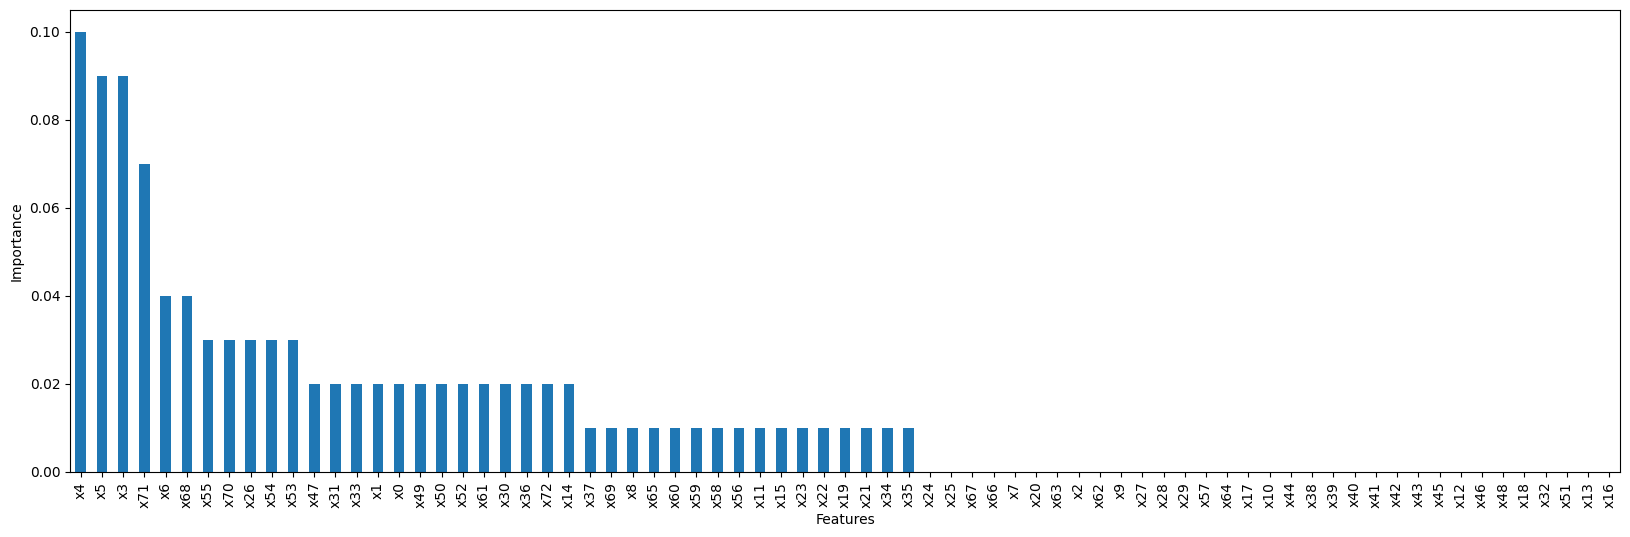

In [123]:
import matplotlib.pyplot as plt

rfa.feature_importances_.plot.bar(figsize=(20,6))
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

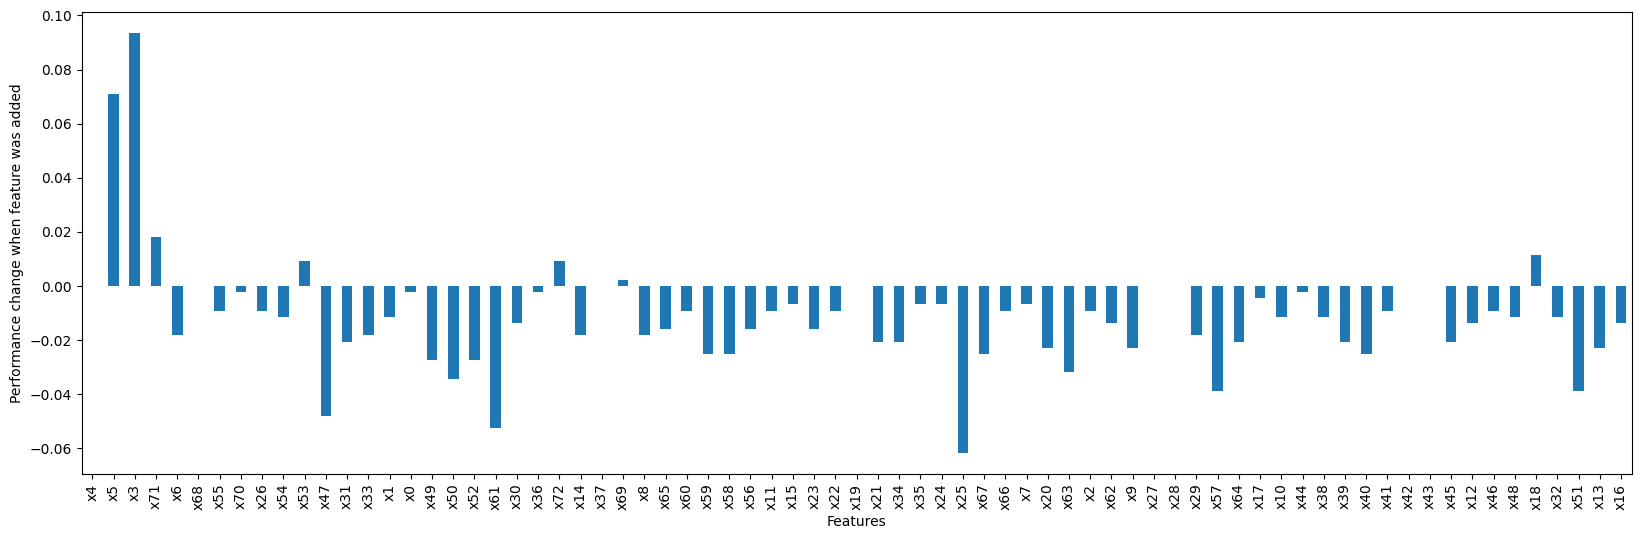

In [124]:
pd.Series(rfa.performance_drifts_).plot.bar(figsize=(20,6))
plt.xlabel('Features')
plt.ylabel('Performance change when feature was added')
plt.show()

In [125]:
# Number of features that will be removed

len(rfa.features_to_drop_)

65

In [126]:
# select features

X_train_rfa = rfa.transform(X_train_scaler)
X_test_rfa = rfa.transform(X_test_scaler)

In [127]:
model = AdaBoostClassifier()

model.fit(X_train_rfa, y_train)

AdaBoostClassifier()

In [128]:
model.score(X_test_rfa, y_test)

0.8076923076923077

In [96]:
sc = QuantileTransformer()
X_train_scaler = sc.fit_transform(X_train_fe_variance)
X_test_scaler = sc.transform(X_test_fe_variance)

model = AdaBoostClassifier()

model.fit(X_train_scaler, y_train)

model.score(X_train_scaler, y_train), model.score(X_test_scaler, y_test)

(0.8835616438356164, 0.8461538461538461)

## 8. Save models

In [98]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([("corr_sel", sel), ("quantile", sc), ("model", model)])

In [100]:
pipe.score(X_test, y_test)

0.8461538461538461

In [103]:
import pickle

pickle.dump(pipe, open("pipeline.pkl", "wb"))

In [97]:
sel

SmartCorrelatedSelection(selection_method='variance', threshold=0.9)

In [2]:
from sklearn.pipeline import Pipeline
import pickle

In [3]:
pipeline = pickle.load(open("pipeline.pkl", "rb"))

array([0, 1, 3])